## High level data management with `pandas`

pandas offers easy to use data-structures for cleanly handling tabular data. Many built-in tools make manipulation and analysis straight forward.

### The pandas `DataFrame`

The primary pandas data structure. This is used to put labels and metadata onto rectangular 2D data.

In [1]:
import pandas as pd

#pd.DataFrame?

In [2]:
cargo = pd.DataFrame([['banana', 12], ['apples', 50], ['milk', 4]], 
                     columns=['type', 'quantity'])

print(cargo)
cargo

     type  quantity
0  banana        12
1  apples        50
2    milk         4


,type,quantity
0,banana,12
1,apples,50
2,milk,4


### `numpy.array` vs. `dict` vs. `pandas.DataFrame`

We already learnt data structures, like numpy arrays and python dictionaries. What are the advantages of the pandas data frame?

#### 1. Labels

In [3]:
import numpy as np

In [4]:
types = np.array(['type', 'quantity'])
cargo = np.array([['banana', 12], 
                  ['apples', 50], 
                  ['milk', 4]])

print(types, cargo, sep='\n')

['type' 'quantity']
[['banana' '12']
 ['apples' '50']
 ['milk' '4']]


In [5]:
cargo = {'type': ['banana', 'apples', 'milk'], 
         'quantity': [12, 50, 4]}

print(cargo)

{'type': ['banana', 'apples', 'milk'], 'quantity': [12, 50, 4]}


In [6]:
cargo = pd.DataFrame([['banana', 12], ['apples', 50], ['milk', 4]], 
                     columns=['type', 'quantity'])

cargo

,type,quantity
0,banana,12
1,apples,50
2,milk,4


#### 2. Custom indexing

In [7]:
cargo = pd.DataFrame([['banana', 12], ['apples', 50], ['milk', 4]], 
                     columns=['type', 'quantity'], 
                     index=['c1', 'c2', 'c3'])

cargo

,type,quantity
c1,banana,12
c2,apples,50
c3,milk,4


#### 3. Versatility

In [8]:
print(cargo.columns.to_list())
print(cargo.to_numpy())
cargo.describe()

['type', 'quantity']
[['banana' 12]
 ['apples' 50]
 ['milk' 4]]


,quantity
count,3.000000
mean,22.000000
std,24.576411
min,4.000000
25%,8.000000
50%,12.000000
75%,31.000000
max,50.000000


In [9]:
cargo[cargo['quantity'] >= 40]

,type,quantity
c2,apples,50


### Basics: manual creation, data selection, manipulation

####  Creation via lists/arrays

In [10]:
labels = ['type', 'quantity', 'fresh']  # columns
data = np.array([['banana', 12, False],  # 1. row
                 ['apples', 50, True],  # 2. row
                 ['milk', 4, True]])  # 3. row
index = ['c1', 'c2', 'c3']

cargo = pd.DataFrame(data, columns=labels, index=index)
cargo

,type,quantity,fresh
c1,banana,12,False
c2,apples,50,True
c3,milk,4,True


In [11]:
n = 11
t = np.linspace(0, 1, n)  # time-axis
data = np.array([t, np.sin(t), np.cos(t)]).T  # (rows, columns) = (n, 3)
labels = ['time', 'sin', 'cos']

signal = pd.DataFrame(data, columns=labels)
signal

,time,sin,cos
0,0.0,0.000000,1.000000
1,0.1,0.099833,0.995004
2,0.2,0.198669,0.980067
3,0.3,0.295520,0.955336
4,0.4,0.389418,0.921061
5,0.5,0.479426,0.877583
6,0.6,0.564642,0.825336
7,0.7,0.644218,0.764842
8,0.8,0.717356,0.696707
9,0.9,0.783327,0.621610


####  Creation via dictionaries

In [12]:
# labels are dict-keys, data is dict-values
data_dict = {'type': ['banana', 'apples', 'milk'], 
             'quantity': [12, 50, 4], 
             'fresh': [False, True, True]}
index = ['c1', 'c2', 'c3']

cargo = pd.DataFrame(data_dict, index=index)
cargo

,type,quantity,fresh
c1,banana,12,False
c2,apples,50,True
c3,milk,4,True


#### Viewing data

In [13]:
n = 101
t = np.linspace(0, 1, n)  # time-axis
data = np.array([t, np.sin(t), np.cos(t)]).T  # (rows, columns) = (n, 3)
labels = ['time', 'sin', 'cos']

signal = pd.DataFrame(data, columns=labels)
signal

,time,sin,cos
0,0.00,0.000000,1.000000
1,0.01,0.010000,0.999950
2,0.02,0.019999,0.999800
3,0.03,0.029996,0.999550
4,0.04,0.039989,0.999200
...,...,...,...
96,0.96,0.819192,0.573520
97,0.97,0.824886,0.565300
98,0.98,0.830497,0.557023
99,0.99,0.836026,0.548690


In [14]:
signal.head()

,time,sin,cos
0,0.00,0.000000,1.00000
1,0.01,0.010000,0.99995
2,0.02,0.019999,0.99980
3,0.03,0.029996,0.99955
4,0.04,0.039989,0.99920


In [15]:
signal.tail(3)

,time,sin,cos
98,0.98,0.830497,0.557023
99,0.99,0.836026,0.548690
100,1.00,0.841471,0.540302


In [16]:
print(cargo.index)

print(cargo.columns)

Index(['c1', 'c2', 'c3'], dtype='object')
Index(['type', 'quantity', 'fresh'], dtype='object')


#### Accessing elements

In [17]:
#cargo[0]
#cargo['c1']
cargo['type']

c1    banana
c2    apples
c3      milk
Name: type, dtype: object

In [18]:
cargo.type

c1    banana
c2    apples
c3      milk
Name: type, dtype: object

In [19]:
type(cargo['type'])

pandas.core.series.Series

In [20]:
type(cargo[['type']])

pandas.core.frame.DataFrame

In [21]:
cargo[['type', 'quantity']]

,type,quantity
c1,banana,12
c2,apples,50
c3,milk,4


In [22]:
cargo[0:1]

,type,quantity,fresh
c1,banana,12,False


In [23]:
type(cargo[0:1])

pandas.core.frame.DataFrame

In [24]:
cargo[0:2]

,type,quantity,fresh
c1,banana,12,False
c2,apples,50,True


In [25]:
cargo[2:]

,type,quantity,fresh
c3,milk,4,True


In [26]:
# (numpay.array), don't:
try:
    cargo[1, 2]
    cargo[0, 'quantity']
except:
    print('does not work.')
finally:
    pass

# do:
cargo[0:1][['quantity']]
cargo[0:2][['type', 'quantity']]

does not work.


,type,quantity
c1,banana,12
c2,apples,50


#### Acess via `loc` and `iloc`

`loc` gives the possibility of selection by label (or specified index). `iloc` is the selection by position (or unspecified index).

`loc` is not a method, but an attribute, that allows for a convenient way of accessing data. The input-signature is `.loc[index_label, column_label]`, where both labels may be single values or lists.

In [27]:
cargo.loc['c1']

type        banana
quantity        12
fresh        False
Name: c1, dtype: object

In [28]:
cargo.loc['c1', 'type']

'banana'

In [29]:
cargo.loc[['c1', 'c2'], ['type', 'quantity']]

,type,quantity
c1,banana,12
c2,apples,50


In [30]:
cargo.loc[:, 'type']

c1    banana
c2    apples
c3      milk
Name: type, dtype: object

In [31]:
cargo.loc['c1', :]

type        banana
quantity        12
fresh        False
Name: c1, dtype: object

`iloc` is another attribute, that allows for a 'classical' way of accessing data:

In [32]:
cargo.iloc[1, 0]

'apples'

In [33]:
cargo.iloc[:, 0]

c1    banana
c2    apples
c3      milk
Name: type, dtype: object

In [34]:
cargo.iloc[0:2, :]

,type,quantity,fresh
c1,banana,12,False
c2,apples,50,True


In [35]:
cargo.iloc[[0, 2], [1, 0]]

,quantity,type
c1,12,banana
c3,4,milk


#### Fancy/Boolean indexing

In [36]:
cargo[['quantity']] > 20

,quantity
c1,False
c2,True
c3,False


In [37]:
cargo.loc[:, 'quantity'] > 20

c1    False
c2     True
c3    False
Name: quantity, dtype: bool

In [38]:
cargo[cargo[['quantity']] > 20]

,type,quantity,fresh
c1,NaN,NaN,NaN
c2,NaN,50.0,NaN
c3,NaN,NaN,NaN


In [39]:
cargo.loc[cargo.loc[:, 'quantity'] > 20].loc[:, 'quantity']

c2    50
Name: quantity, dtype: int64

#### Manipulation

In [40]:
print(cargo.iloc[0, 1])
cargo.iloc[0, 1] = 0
print(cargo.iloc[0, 1])

12
0


In [41]:
cargo.loc[:, 'quantity'] = [0, 0, 0]
cargo

,type,quantity,fresh
c1,banana,0,False
c2,apples,0,True
c3,milk,0,True


In [42]:
cargo.loc['c3'] = ['melon', 10, False]
cargo

,type,quantity,fresh
c1,banana,0,False
c2,apples,0,True
c3,melon,10,False


In [43]:
cargo.loc[:, ['fresh']] = [True, False, True]
cargo.rename(columns={'fresh': 'stale'}, inplace=True)
cargo

,type,quantity,stale
c1,banana,0,True
c2,apples,0,False
c3,melon,10,True


In [44]:
cargo.index = [0, 1, 2]
cargo

,type,quantity,stale
0,banana,0,True
1,apples,0,False
2,melon,10,True


In [45]:
cargo['target'] = [5, 0, 5]
cargo

,type,quantity,stale,target
0,banana,0,True,5
1,apples,0,False,0
2,melon,10,True,5


In [46]:
cargo.append?

In [47]:
cargo = cargo.append({'type': 'milk', 'quantity': 2, 
                      'stale': False, 'target': 2}, 
                     ignore_index=True)

In [48]:
stock = cargo['quantity'] == cargo['target']
stock, type(stock)

(0    False
 1     True
 2    False
 3     True
 dtype: bool,
 pandas.core.series.Series)

In [49]:
pd.concat([cargo, stock.rename('stock')], axis=1)

,type,quantity,stale,target,stock
0,banana,0,True,5,False
1,apples,0,False,0,True
2,melon,10,True,5,False
3,milk,2,False,2,True


### Creation from external sources

In [51]:
import pandas as pd

In [52]:
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [53]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user')
users.head()

,user_id|age|gender|occupation|zip_code
0,1|24|M|technician|85711
1,2|53|F|other|94043
2,3|23|M|writer|32067
3,4|24|M|technician|43537
4,5|33|F|other|15213


In [54]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                    sep='|', index_col='user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [55]:
#pd.read_<TAB>

### Iteration

By default, iteration over a dataframe will only return labels:

In [56]:
cargo

,type,quantity,stale,target
0,banana,0,True,5
1,apples,0,False,0
2,melon,10,True,5
3,milk,2,False,2


In [57]:
for col_label in cargo:
    print(col_label)

type
quantity
stale
target


In [58]:
for key, val in cargo.items():
    print(key)
    print(val)

type
0    banana
1    apples
2     melon
3      milk
Name: type, dtype: object
quantity
0     0
1     0
2    10
3     2
Name: quantity, dtype: int64
stale
0     True
1    False
2     True
3    False
Name: stale, dtype: bool
target
0    5
1    0
2    5
3    2
Name: target, dtype: int64


In [59]:
for key, ser in cargo.items():
    print(key)
    for elm in ser:
        print(elm)

type
banana
apples
melon
milk
quantity
0
0
10
2
stale
True
False
True
False
target
5
0
5
2


Iteration over rows is also possible

In [60]:
for row_index, row in cargo.iterrows():
    print(row_index)
    print(row)

0
type        banana
quantity         0
stale         True
target           5
Name: 0, dtype: object
1
type        apples
quantity         0
stale        False
target           0
Name: 1, dtype: object
2
type        melon
quantity       10
stale        True
target          5
Name: 2, dtype: object
3
type         milk
quantity        2
stale       False
target          2
Name: 3, dtype: object


### Advanced functionality

The pandas dataframe is incredibly versatile and offers many different functionalities for analysing 2D data. Here is a very brief introduction, most of the functions, methods and modules you will however learn as you go (also see [the pandas web page](https://pandas.pydata.org/docs/index.html))

#### `apply`: Apply functions to elements

In [62]:
signal

,time,sin,cos
0,0.00,0.000000,1.000000
1,0.01,0.010000,0.999950
2,0.02,0.019999,0.999800
3,0.03,0.029996,0.999550
4,0.04,0.039989,0.999200
...,...,...,...
96,0.96,0.819192,0.573520
97,0.97,0.824886,0.565300
98,0.98,0.830497,0.557023
99,0.99,0.836026,0.548690


In [63]:
np.sum(signal)

time    50.500000
sin     46.390122
cos     84.916548
dtype: float64

In [64]:
try:
    sum(signal)
except:
    print('exception')
finally:
    pass    

exception


In [65]:
signal.apply(sum)

time    50.500000
sin     46.390122
cos     84.916548
dtype: float64

In [66]:
signal.apply(sum, axis=1)

0      1.000000
1      1.019950
2      1.039799
3      1.059546
4      1.079189
         ...   
96     2.352712
97     2.360185
98     2.367520
99     2.374716
100    2.381773
Length: 101, dtype: float64

#### `pivot`: Reshape and reorganize data

In [67]:
cargo

,type,quantity,stale,target
0,banana,0,True,5
1,apples,0,False,0
2,melon,10,True,5
3,milk,2,False,2


In [68]:
cargo.pivot(index='quantity', columns='type', values=['stale'])

stale                    
type     apples banana melon   milk
quantity                           
0         False   True   NaN    NaN
2           NaN    NaN   NaN  False
10          NaN    NaN  True    NaN

In [69]:
cargo.pivot(index='stale', columns='quantity', values=['type', 'target'])

type              target          
quantity      0     2      10     0    2    10
stale                                         
False     apples  milk    NaN      0    2  NaN
True      banana   NaN  melon      5  NaN    5

#### `plot`: Quick visualization

In [70]:
%matplotlib inline

signal

,time,sin,cos
0,0.00,0.000000,1.000000
1,0.01,0.010000,0.999950
2,0.02,0.019999,0.999800
3,0.03,0.029996,0.999550
4,0.04,0.039989,0.999200
...,...,...,...
96,0.96,0.819192,0.573520
97,0.97,0.824886,0.565300
98,0.98,0.830497,0.557023
99,0.99,0.836026,0.548690


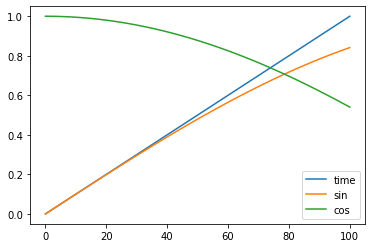

In [71]:
signal.plot()

Text(0, 0.5, 'y')

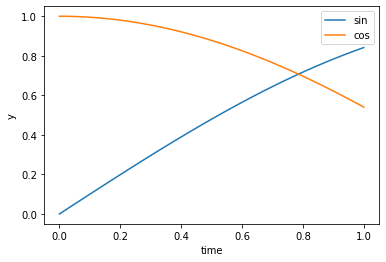

In [72]:
ax = signal.plot(x='time')
ax.set_ylabel('y')

In [73]:
cargo

,type,quantity,stale,target
0,banana,0,True,5
1,apples,0,False,0
2,melon,10,True,5
3,milk,2,False,2


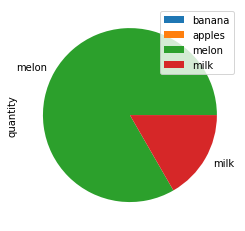

In [74]:
ax = cargo.plot.pie(labels=cargo['type'], y='quantity')

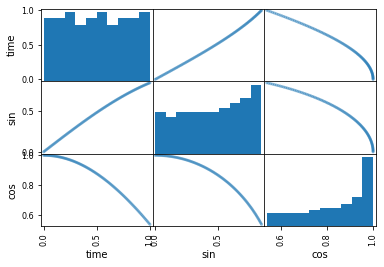

In [75]:
from pandas.plotting import scatter_matrix

axes = scatter_matrix(signal)